Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1009
           1       0.97      0.93      0.95       400

    accuracy                           0.97      1409
   macro avg       0.97      0.96      0.96      1409
weighted avg       0.97      0.97      0.97      1409

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1009
           1       0.99      0.92      0.95       400

    accuracy                           0.97      1409
   macro avg       0.98      0.96      0.97      1409
weighted avg       0.97      0.97      0.97      1409



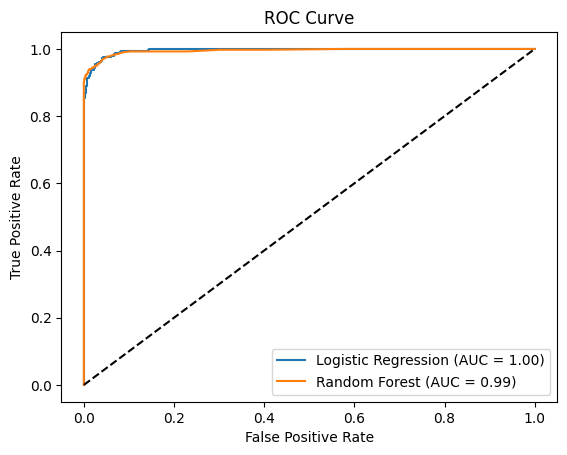

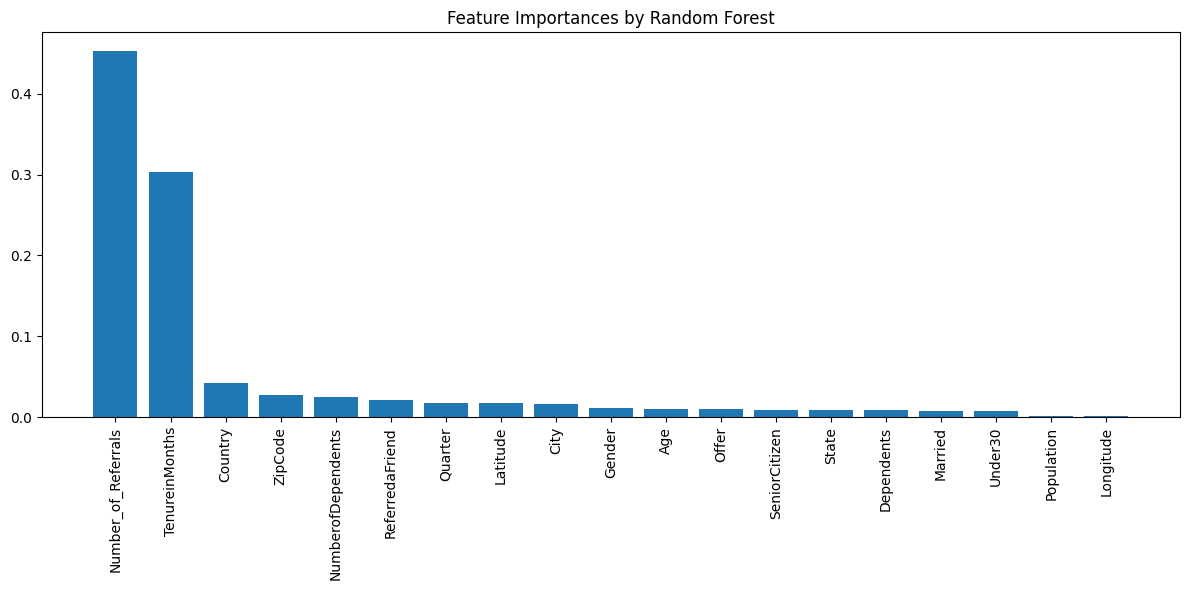

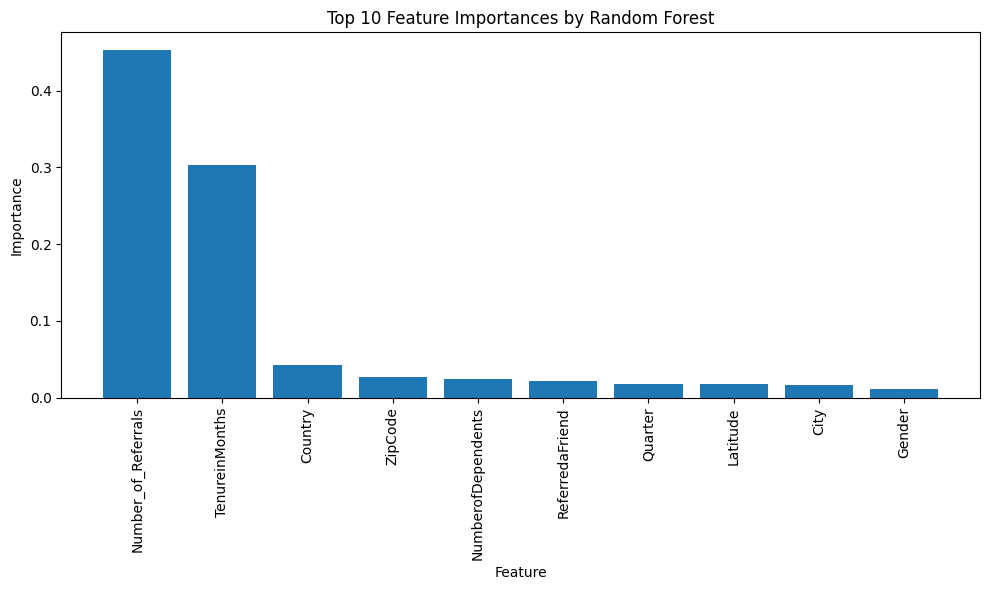

Logistic Regression AUC: 1.00
Random Forest AUC: 0.99
Logistic Regression outperforms Random Forest in AUC score.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/TelcoCustomerChurn.csv')

# Data Cleaning and Preprocessing
df.drop(['CustomerID'], axis=1, inplace=True)  # Remove CustomerID
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric

# Fill missing values for numeric columns with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    df[column] = df[column].fillna(df[column].mode()[0])

# Encode categorical variables
for column in categorical_cols:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature Engineering
df['Interaction'] = df['MonthlyCharge'] * df['TenureinMonths']  # Corrected column name

# Splitting the dataset into features and target variable
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# ROC Curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances by Random Forest')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Displaying the top 10 most important features for Random Forest
top_n = 10  # Top features to display
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:top_n]
top_features = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances by Random Forest')
plt.bar(range(top_n), importances[indices], align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# AUC Scores for Model Comparison
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

print(f"Logistic Regression AUC: {auc_lr:.2f}")
print(f"Random Forest AUC: {auc_rf:.2f}")

if auc_rf > auc_lr:
    print("Random Forest outperforms Logistic Regression in AUC score.")
else:
    print("Logistic Regression outperforms Random Forest in AUC score.")





In [4]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression Cross-Validation AUC scores: {cv_scores_lr}")
print(f"Logistic Regression Mean AUC: {cv_scores_lr.mean():.2f}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest Cross-Validation AUC scores: {cv_scores_rf}")
print(f"Random Forest Mean AUC: {cv_scores_rf.mean():.2f}")


Logistic Regression Cross-Validation AUC scores: [0.99693755 0.99751737 0.99692122 0.99783179 0.99609127]
Logistic Regression Mean AUC: 1.00
Random Forest Cross-Validation AUC scores: [0.99773379 0.99688651 0.99819928 0.99835444 0.99484572]
Random Forest Mean AUC: 1.00


Features used in training: Index(['Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married', 'Dependents',
       'NumberofDependents', 'Country', 'State', 'City', 'ZipCode', 'Latitude',
       'Longitude', 'Population', 'Quarter', 'ReferredaFriend',
       'Number_of_Referrals', 'TenureinMonths', 'Offer', 'PhoneService',
       'AvgMonthlyLongDistanceCharges', 'MultipleLines', 'InternetService',
       'InternetType', 'AvgMonthlyGBDownload', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport',
       'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges',
       'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore',
       'CustomerStatus', 'ChurnScore', 'CLTV', 'ChurnCategory', 'ChurnReason',
       'Interaction'],
      dtype='object')
Features used in training after removing leakage features: I

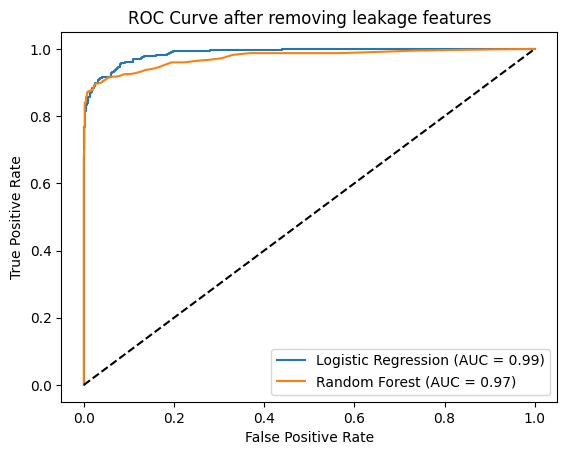

In [5]:
# Verify the features used in the model training
print("Features used in training:", X.columns)

# Removing leakage-prone features
leakage_features = ['CustomerStatus', 'ChurnScore', 'ChurnCategory', 'ChurnReason']
df = df.drop(columns=leakage_features, errors='ignore')

# Check the remaining features
print("Features used in training after removing leakage features:", df.columns)

# Continue with the rest of the steps for preprocessing, training, and evaluation as before
# Splitting the dataset into features and target variable
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=[np.number]).columns
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Retrain Logistic Regression and Random Forest models
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the models again
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Calculate and display ROC curves and AUC scores again
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after removing leakage features')
plt.legend(loc="lower right")
plt.show()



Logistic Regression Model Performance:
AUC: 0.9959638255698711
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1009
           1       0.93      0.90      0.91       400

    accuracy                           0.95      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.95      0.95      0.95      1409

Random Forest Model Performance:
AUC: 0.9948216055500495
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1009
           1       0.99      0.85      0.91       400

    accuracy                           0.95      1409
   macro avg       0.96      0.92      0.94      1409
weighted avg       0.95      0.95      0.95      1409



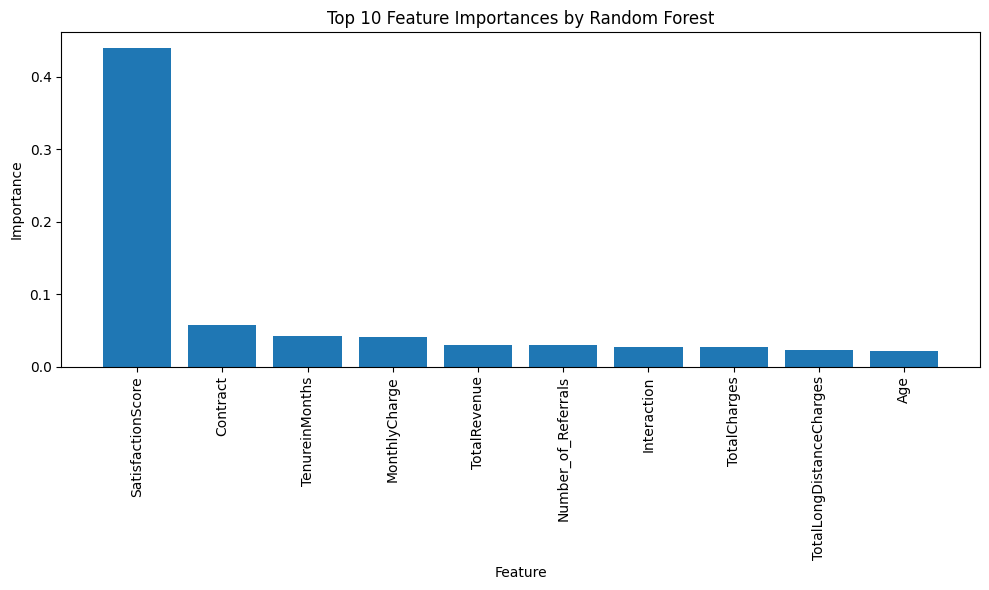

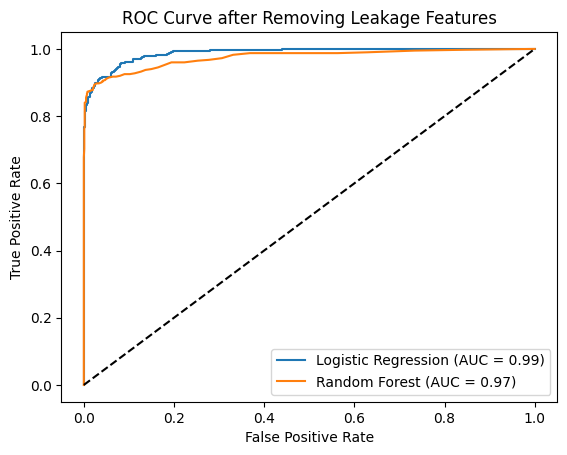

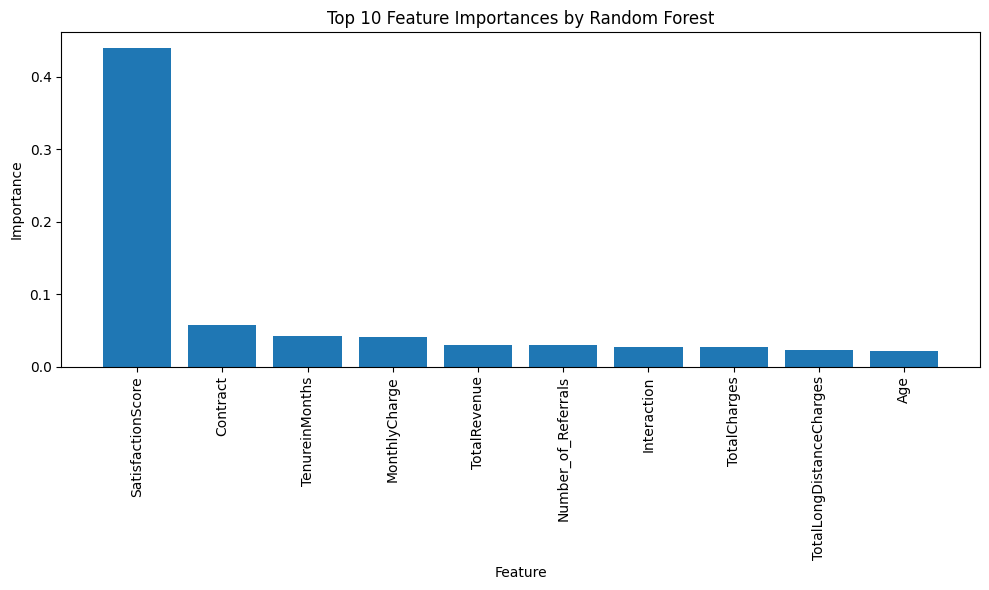

In [6]:
# Summarize Model Performance
print("Logistic Regression Model Performance:")
print("AUC:", auc_lr)
print("Classification Report:\n", classification_report(y_test, lr_predictions))

print("Random Forest Model Performance:")
print("AUC:", auc_rf)
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Displaying the top 10 most important features for Random Forest
top_n = 10
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:top_n]
top_features = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances by Random Forest')
plt.bar(range(top_n), importances[indices], align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


# Save ROC Curve plot
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Removing Leakage Features')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve.png')

# Save Feature Importance plot
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances by Random Forest')
plt.bar(range(top_n), importances[indices], align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.savefig('Feature_Importance.png')




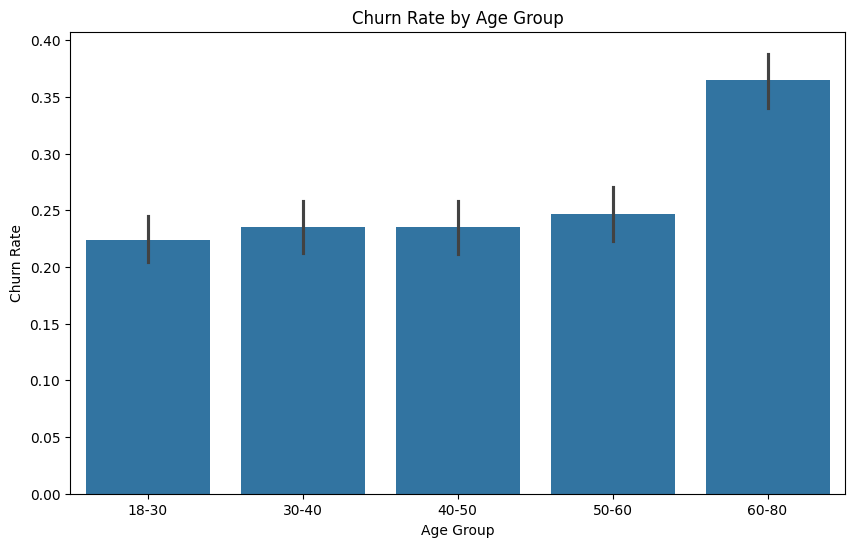

<Figure size 640x480 with 0 Axes>

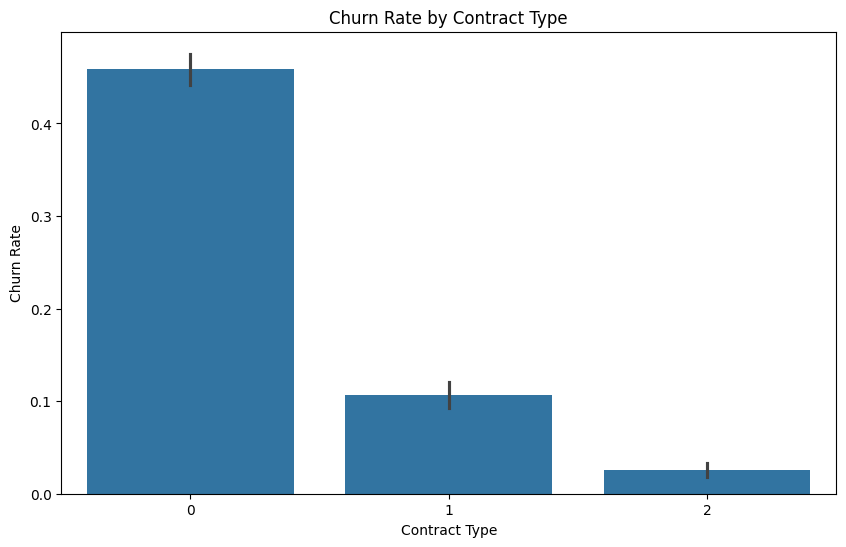

<ipython-input-8-ef238870a972>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['ChurnLabel'] == 1]['MonthlyCharge'], label='Churned', shade=True)
<ipython-input-8-ef238870a972>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['ChurnLabel'] == 0]['MonthlyCharge'], label='Not Churned', shade=True)


<Figure size 640x480 with 0 Axes>

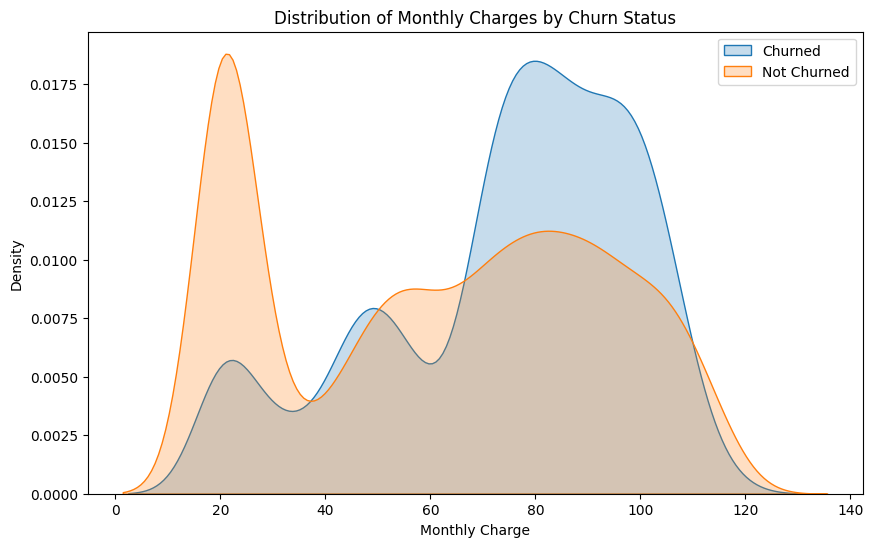

<ipython-input-8-ef238870a972>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['ChurnLabel'] == 1]['TenureinMonths'], label='Churned', shade=True)
<ipython-input-8-ef238870a972>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['ChurnLabel'] == 0]['TenureinMonths'], label='Not Churned', shade=True)


<Figure size 640x480 with 0 Axes>

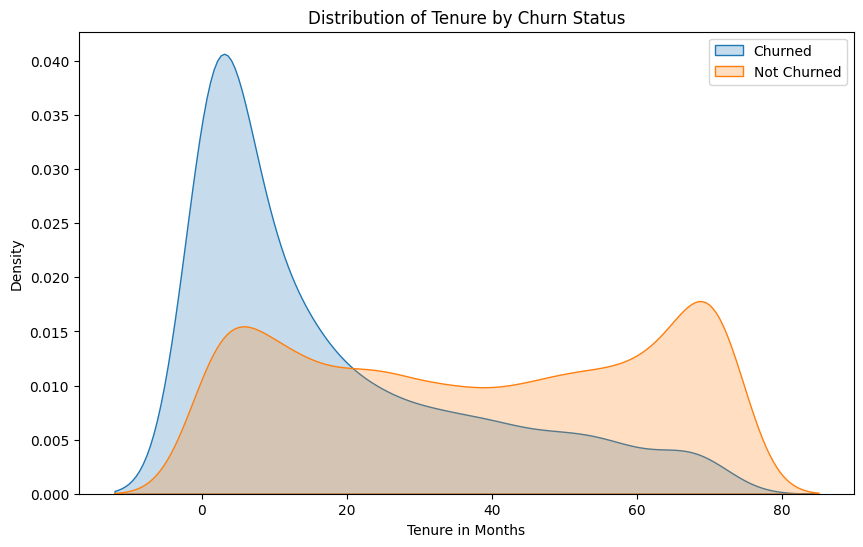

<ipython-input-8-ef238870a972>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['ChurnLabel'] == 1]['TotalCharges'], label='Churned', shade=True)
<ipython-input-8-ef238870a972>:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['ChurnLabel'] == 0]['TotalCharges'], label='Not Churned', shade=True)


<Figure size 640x480 with 0 Axes>

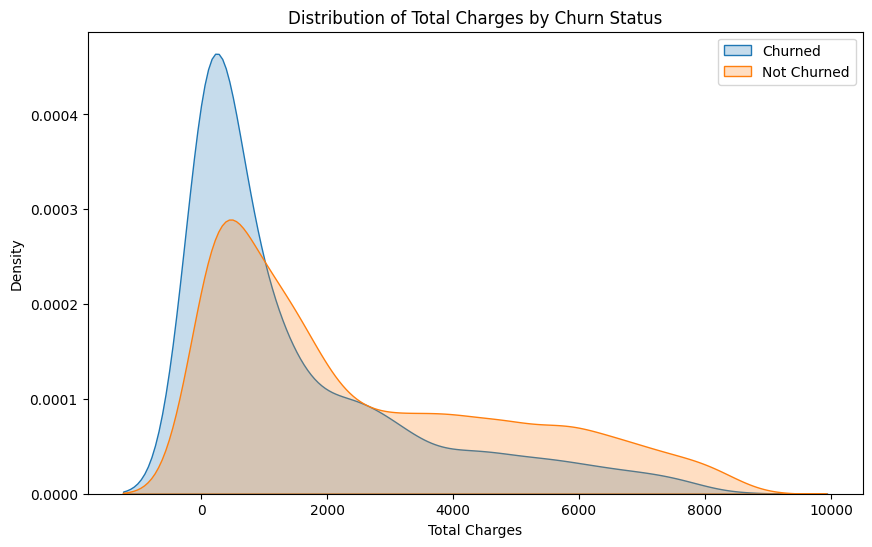

<Figure size 640x480 with 0 Axes>

In [8]:
# Define age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 80], labels=['18-30', '30-40', '40-50', '50-60', '60-80'])

# Plot churn rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='ChurnLabel', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.show()
plt.savefig('Churn by age.png')
# Plot churn rate by contract type
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='ChurnLabel', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.show()
plt.savefig('Churn by Contract type.png')
# Distribution of Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['ChurnLabel'] == 1]['MonthlyCharge'], label='Churned', shade=True)
sns.kdeplot(df[df['ChurnLabel'] == 0]['MonthlyCharge'], label='Not Churned', shade=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charge')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.savefig('Monthly charges.png')

# Distribution of Tenure by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['ChurnLabel'] == 1]['TenureinMonths'], label='Churned', shade=True)
sns.kdeplot(df[df['ChurnLabel'] == 0]['TenureinMonths'], label='Not Churned', shade=True)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.savefig('Tenure.png')

# Distribution of Total Charges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['ChurnLabel'] == 1]['TotalCharges'], label='Churned', shade=True)
sns.kdeplot(df[df['ChurnLabel'] == 0]['TotalCharges'], label='Not Churned', shade=True)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.savefig('Charges.png')
